In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import scipy
import math
import irreducible_library as irr
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, rcParams
# Make use of TeX\ufeff
#rc('text',usetex=True)
# Change all fonts to ‘Computer Modern’
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:78: RuntimeWarning: overflow encountered in exp
  2*T/(3*np.pi**2)*np.sqrt((y*T)**2-me**2)**3/(np.exp(y-ue(T)/T)+1), me/T, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:87: RuntimeWarning: overflow encountered in exp
  2*T/np.pi**2*(y*T)**2 * np.sqrt((y*T)**2-me**2)/(np.exp(y-ue(T)/T)+1), me/T, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:78: RuntimeWarning: invalid value encountered in sqrt
  2*T/(3*np

In [64]:
mlist = np.logspace(-3,0,num=25)
abundance = [1,0.3,0.01,0.001]
Q_production_nomu=[  9.36431037e-11,   8.75851343e-11,   8.20430909e-11,
         7.68946804e-11,   7.20247231e-11,   6.81605003e-11,
         6.41616007e-11,   6.11040555e-11,   5.74944927e-11,
         5.48654911e-11,   5.19668008e-11,   4.95793383e-11,
         4.73794625e-11,   4.57432551e-11,   4.34744453e-11,
         4.16537510e-11,   4.01249889e-11,   3.86509476e-11,
         3.72133087e-11,   3.59145588e-11,   3.49409810e-11,
         3.38245198e-11,   3.29930543e-11,   3.22923893e-11,
         3.16328930e-11];
         
restofarr =[3.07377148e-11,   3.00498394e-11,
         2.95302655e-11,   2.87779923e-11,   2.82751424e-11,
         2.74036970e-11,   2.68122732e-11,   2.62415854e-11,
         2.55004549e-11,   2.48448505e-11,   2.42319732e-11,
         2.34654551e-11,   2.26272377e-11,   2.19081482e-11,
         2.11100833e-11,   2.03274966e-11,   1.94843612e-11,
         1.87049460e-11,   1.79964084e-11,   1.74194233e-11,
         1.73340126e-11,   1.75973880e-11,   1.79181484e-11,
         1.81699607e-11,   1.85652785e-11];

In [83]:
def relic_ann(Q, mx, whole_shebang=False, muon=True, noQ = False):
    """ 
    Given a value of Q and mx returns the number density over relic abundance due to e+e- annihilations.
    """
    Tlist = np.logspace(2.5, -5,num=500)
    gamma_list = [irr.gamma_ann(Q, mx, i,muon=muon, noQ = noQ) for i in Tlist]
    gamma=scipy.interpolate.interp1d(Tlist, gamma_list, fill_value = 'extrapolate')
    alist = np.logspace(-1.9, 4.5,num=500)
    
    if noQ:
        if mx < 0.001:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05/10**(-30))], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05/10**(-22))], alist)
        #print("This function is returning (nDM(modified no Q) final, a_max)")
        return np.array([np.exp(gulu[-1][-1]),alist[-1]])
    else:
        if mx < 0.001:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05)], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05)], alist)
        if whole_shebang:
            print(np.exp(gulu[-1])/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3)
            return np.exp(gulu).flatten()
        else:
            return np.exp(gulu[-1][-1])/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3

In [84]:
#Q = np.zeros(3)
Q1 = np.zeros(25)
Q2 = np.zeros(25)
Q3 = np.zeros(25)
Q4 = np.zeros(25)

for i in range(25):
    info1 = relic_ann(0,mlist[i],noQ = True)
    Q1[i] = np.sqrt(abundance[1]*100**3*irr.nxrelic(mlist[i],irr.T(100))/(info[1]**3*info[0]))
    info2 = relic_ann(Q_production_nomu[i],mlist[i])
    Q2[i] = np.sqrt(abundance[1]/info2)*Q_production_nomu[i]
    #info3 = relic_ann(0,mlist[i],noQ = True)
    #Q3[i] = np.sqrt(abundance[2]*100**3*irr.nxrelic(mlist[i],irr.T(100))/(info[1]**3*info[0]))
    #info4 = relic_ann(0,mlist[i],noQ = True)
    #Q4[i] = np.sqrt(abundance[3]*100**3*irr.nxrelic(mlist[i],irr.T(100))/(info[1]**3*info[0]))


/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:302: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(integrand, max(4*me**2, 4*mx**2), np.inf)[0]\
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:303: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  +integrate.quad(integrandmu, 4*mmu**2, np.inf)[0]


0.052370923256196196
0.06109340162377669
0.07148588338182889
0.0837393833697016
0.09797130394746598
0.11700406680795278
0.13825698252276067
0.16721422479303
0.19741858550605215
0.23973628939708902
0.28680648724044133
0.34812645644071943
0.42395322408752284
0.5269746352696996
0.6347480644225596
0.7770233248601761
0.9614500165967369
1.1893920563482276
1.4692822411357305
1.8208692785799925
2.281233415693758
2.7743901494383216
3.0505516589983124
2.872041915470138
2.673390150386399


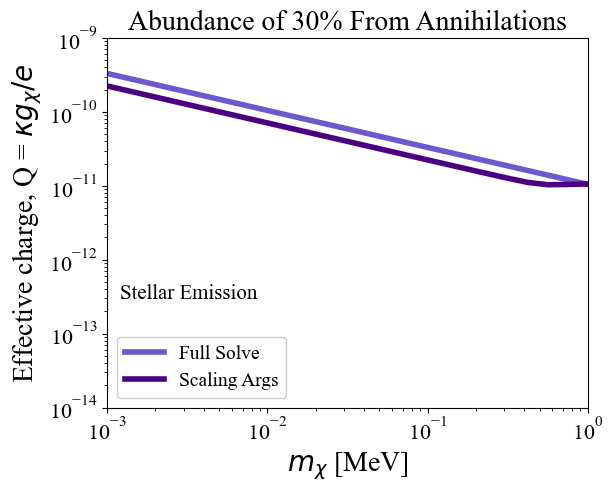

In [87]:
f, ax = plt.subplots()
f.set_size_inches(6.2, 4.8)

ax.loglog(mlist, Q1,c='slateblue',lw=4,label = r'Full Solve')
ax.loglog(mlist, Q2,c='indigo',lw=4,label = r'Scaling Args')
#ax.loglog(mlist, Q3,c='indianred',lw=4,label = r'$\frac{\Omega_{\gamma^\star->DM}}{\Omega_{relic}} = 0.01$')
#ax.loglog(mlist, Q4,c='olivedrab',lw=4,label = r'$\frac{\Omega_{\gamma^\star->DM}}{\Omega_{relic}} = 0.001$')
#ax.loglog(m_production, Q_production,c='slateblue',lw=4)#, ls=":")
#ax.loglog(m_production, Q_ann_production,c='slateblue',lw=4)
ax.set_xlim([1e-3, 1])
ax.set_ylim([1e-14, 1e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)

#plotfiles(ax, 'stars', projection=False, DD=False,color='LightSteelBlue',a=0.3)
#plotfiles(ax, 'stars_conservative', projection=False, DD=False,color='LightSteelBlue',a=0.3)
ax.text(1.2e-3, 3e-13, r'Stellar Emission', rotation=0, color='k', fontsize=15)


ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_title('Abundance of 30% From Annihilations', fontsize=20)
lya_index=24
planck_index=27
s4_index = 32
gs_index=38

ax.legend(framealpha=1, loc='lower left', fontsize=14)


#ax.set_xlim([1e-3, 1])
#ax.set_ylim([1e-15, 1e-9])

